In [41]:
from tensorflow import keras
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import tensorflow as tf
# from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize
from sklearn.metrics import precision_recall_fscore_support
from joblib import dump
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import scipy
from sklearn import svm

from sklearn import metrics
import datetime
from tensorboard_logger import configure, log_value

if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


<h3>Analisis exploratorio</h3>

In [2]:
dataset = pd.read_csv("data_titanic_proyecto.csv")
dataset

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Middle,M,N
887,888,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Upper,F,Y
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,Lower,F,N
889,890,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,Upper,M,Y


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [4]:
dataset.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


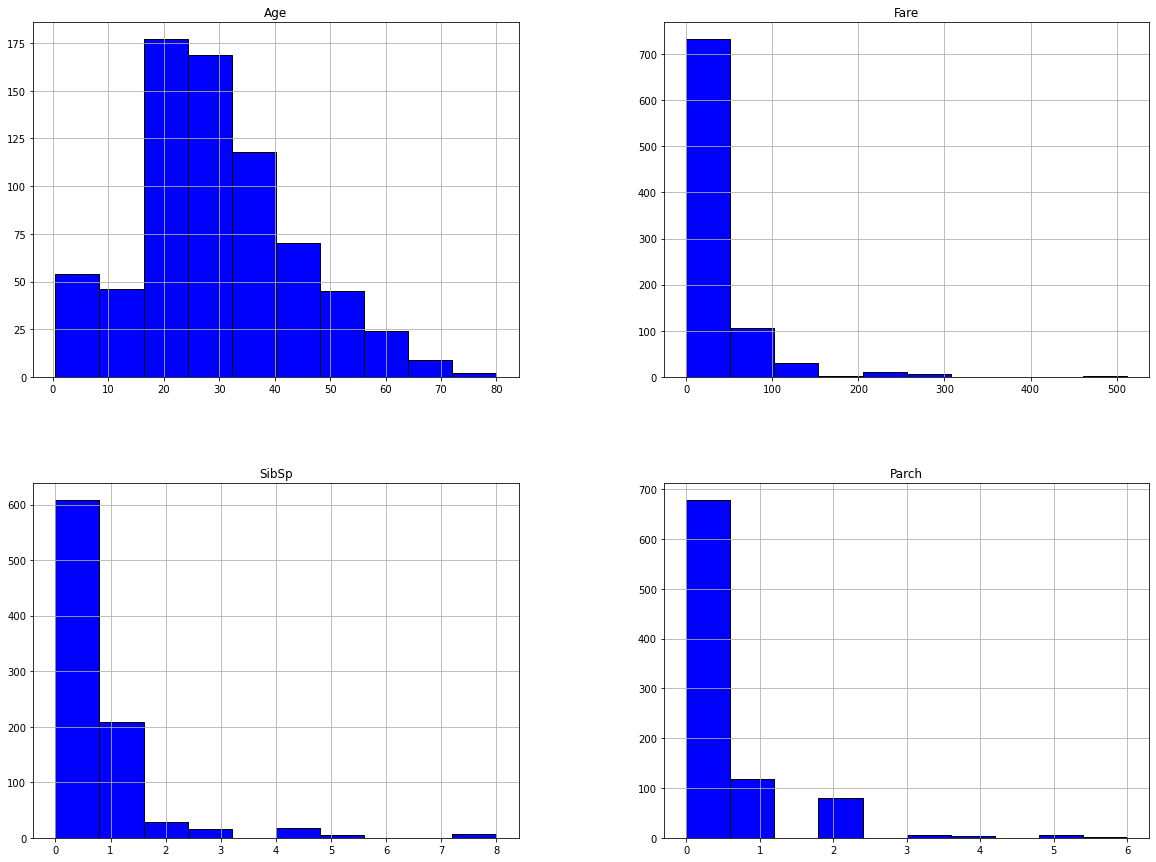

In [5]:
dataset[['Age','Fare','SibSp','Parch']].hist(edgecolor="black", color="blue", figsize=(20,15))
plt.show()

<h3>Ingenieria de caracteristicas</h3>

In [6]:
##Verificacion de valores nulos
dataset.isnull().values.any()

True

In [7]:
df_check=dataset.isna()

check_for_any_nan= dataset.isna().values.any()
# Or
check_for_any_nan= dataset.isna().any().any()
total_nan_values = dataset.isna().sum().sum()
print(df_check)
print("NaN Presence:"+str(check_for_any_nan))
print ("Total Number of NaN values:"+str(total_nan_values))

     PassengerId   Name    Age  SibSp  Parch  Ticket   Fare  Cabin  Embarked  \
0          False  False  False  False  False   False  False   True     False   
1          False  False  False  False  False   False  False  False     False   
2          False  False  False  False  False   False  False   True     False   
3          False  False  False  False  False   False  False  False     False   
4          False  False  False  False  False   False  False   True     False   
..           ...    ...    ...    ...    ...     ...    ...    ...       ...   
886        False  False  False  False  False   False  False   True     False   
887        False  False  False  False  False   False  False  False     False   
888        False  False   True  False  False   False  False   True     False   
889        False  False  False  False  False   False  False  False     False   
890        False  False  False  False  False   False  False   True     False   

     passenger_class  passenger_sex  pa

In [8]:
dataset.isnull().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

<p>Debido a que hay valores nulos en la variable age y la variable cabin se va a hacer la inputacion de estas variables y tambien como vimos en el analisis exploratorio, se van a transformar las variables categoricas que son <b>passenger_survived y passenger_sex</b> a numericas</p>

In [9]:
dataset['passenger_sex']=dataset['passenger_sex'].replace('M',1)
dataset['passenger_sex']=dataset['passenger_sex'].replace('F',0)
dataset['passenger_survived']=dataset['passenger_survived'].replace('Y',1)
dataset['passenger_survived']=dataset['passenger_survived'].replace('N',0)
dataset[['passenger_sex','passenger_survived']]

,passenger_sex,passenger_survived
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,0
889,1,1


In [10]:
dataset_passenger_class = pd.unique(dataset[['passenger_class']].values.ravel())
dataset_passenger_class
#Esto nos dice que solo hay 3 categorias para esta variable por lo que es candidata para one hot encoding

array(['Lower', 'Upper', 'Middle'], dtype=object)

In [11]:
dataset_Embarked = pd.unique(dataset[['Embarked']].values.ravel())
dataset_Embarked
#Esto nos dice que solo hay 3 categorias para esta variable por lo que es candidata para one hot encoding

array(['S', 'C', 'Q', nan], dtype=object)

<b>One-hot-encoding</b>

In [12]:
passenger_class_OHE = pd.get_dummies(dataset.passenger_class,prefix='class')
print(passenger_class_OHE.head())

   class_Lower  class_Middle  class_Upper
0            1             0            0
1            0             0            1
2            1             0            0
3            0             0            1
4            1             0            0


In [13]:
Embarked_OHE = pd.get_dummies(dataset.Embarked,prefix='Embarked')
print(Embarked_OHE.head())

   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1


In [14]:
Embarked_OHE

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [15]:
dataset = pd.concat([dataset,passenger_class_OHE,Embarked_OHE], axis=1)
dataset

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,class_Lower,class_Middle,class_Upper,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,1,0,1,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,0,1,0,0,1,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,0,1,1,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,0,1,0,0,1,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Middle,1,0,0,1,0,0,0,1
887,888,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Upper,0,1,0,0,1,0,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,Lower,0,0,1,0,0,0,0,1
889,890,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,Upper,1,1,0,0,1,1,0,0


In [16]:
dataset = dataset.drop(columns = ['Embarked','passenger_class', 'Ticket', 'Name', 'Cabin', 'PassengerId'])
dataset

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,class_Lower,class_Middle,class_Upper,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1,0,0,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,1,0,0
2,26.0,0,0,7.9250,0,1,1,0,0,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,1,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,0,1,0,0,0,1
887,19.0,0,0,30.0000,0,1,0,0,1,0,0,1
888,NaN,1,2,23.4500,0,0,1,0,0,0,0,1
889,26.0,0,0,30.0000,1,1,0,0,1,1,0,0


<p>La imputacion de incompletos se va a realizar con la media</p>

In [17]:
# dataset=dataset.dropna(subset=['Embarked'])
mean_df_Age = dataset['Age'].mean()
dataset['Age']=dataset['Age'].replace({np.nan:mean_df_Age})
dataset

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,class_Lower,class_Middle,class_Upper,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,1,0,1,0,0,0,0,1
1,38.000000,1,0,71.2833,0,1,0,0,1,1,0,0
2,26.000000,0,0,7.9250,0,1,1,0,0,0,0,1
3,35.000000,1,0,53.1000,0,1,0,0,1,0,0,1
4,35.000000,0,0,8.0500,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,0,0,1,0,0,0,1
887,19.000000,0,0,30.0000,0,1,0,0,1,0,0,1
888,29.699118,1,2,23.4500,0,0,1,0,0,0,0,1
889,26.000000,0,0,30.0000,1,1,0,0,1,1,0,0


In [18]:
#Debido a la relacion de sibsp con parch se hara una transformacion en forma de suma
dataset['FamSize'] = dataset['SibSp'] + dataset['Parch']
dataset

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,class_Lower,class_Middle,class_Upper,Embarked_C,Embarked_Q,Embarked_S,FamSize
0,22.000000,1,0,7.2500,1,0,1,0,0,0,0,1,1
1,38.000000,1,0,71.2833,0,1,0,0,1,1,0,0,1
2,26.000000,0,0,7.9250,0,1,1,0,0,0,0,1,0
3,35.000000,1,0,53.1000,0,1,0,0,1,0,0,1,1
4,35.000000,0,0,8.0500,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,0,0,1,0,0,0,1,0
887,19.000000,0,0,30.0000,0,1,0,0,1,0,0,1,0
888,29.699118,1,2,23.4500,0,0,1,0,0,0,0,1,3
889,26.000000,0,0,30.0000,1,1,0,0,1,1,0,0,0


<h5>Una vez ya terminada la ingenieria de caracteristicas procedemos a normalizar las variables para tener una distribucion lo mas normal posible y que el modelo sea mas optimo</h5>

In [19]:
dataset.isnull().sum()

Age                   0
SibSp                 0
Parch                 0
Fare                  0
passenger_sex         0
passenger_survived    0
class_Lower           0
class_Middle          0
class_Upper           0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
FamSize               0
dtype: int64

In [20]:
dataset[['Age','SibSp','Parch','Fare','FamSize']]=normalize(dataset[['Age','SibSp','Parch','Fare','FamSize']])
dataset

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,class_Lower,class_Middle,class_Upper,Embarked_C,Embarked_Q,Embarked_S,FamSize
0,0.947992,0.043091,0.000000,0.312406,1,0,1,0,0,0,0,1,0.043091
1,0.470345,0.012377,0.000000,0.882309,0,1,0,0,1,1,0,0,0.012377
2,0.956551,0.000000,0.000000,0.291564,0,1,1,0,0,0,0,1,0.000000
3,0.550202,0.015720,0.000000,0.834735,0,1,0,0,1,0,0,1,0.015720
4,0.974555,0.000000,0.000000,0.224148,1,0,1,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.901002,0.000000,0.000000,0.433816,1,0,0,1,0,0,0,1,0.000000
887,0.535052,0.000000,0.000000,0.844819,0,1,0,0,1,0,0,1,0.000000
888,0.781031,0.026298,0.052596,0.616691,0,0,1,0,0,0,0,1,0.078894
889,0.654931,0.000000,0.000000,0.755689,1,1,0,0,1,1,0,0,0.000000


<h3>Datos de entrenamiento y prueba</h3>

In [21]:
var_dep = pd.DataFrame(dataset['passenger_survived'])
var_ind = pd.DataFrame(dataset.drop(columns=['passenger_survived']))

In [22]:
var_ind

,Age,SibSp,Parch,Fare,passenger_sex,class_Lower,class_Middle,class_Upper,Embarked_C,Embarked_Q,Embarked_S,FamSize
0,0.947992,0.043091,0.000000,0.312406,1,1,0,0,0,0,1,0.043091
1,0.470345,0.012377,0.000000,0.882309,0,0,0,1,1,0,0,0.012377
2,0.956551,0.000000,0.000000,0.291564,0,1,0,0,0,0,1,0.000000
3,0.550202,0.015720,0.000000,0.834735,0,0,0,1,0,0,1,0.015720
4,0.974555,0.000000,0.000000,0.224148,1,1,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.901002,0.000000,0.000000,0.433816,1,0,1,0,0,0,1,0.000000
887,0.535052,0.000000,0.000000,0.844819,0,0,0,1,0,0,1,0.000000
888,0.781031,0.026298,0.052596,0.616691,0,1,0,0,0,0,1,0.078894
889,0.654931,0.000000,0.000000,0.755689,1,0,0,1,1,0,0,0.000000


In [23]:
var_dep

,passenger_survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [24]:
X_train,X_test,y_train,y_test =train_test_split(var_ind,var_dep,test_size=0.20, random_state=2022)
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.20, random_state=2022)
dump(X_test, 'xtrain.joblib')
dump(y_test, 'ypredict.joblib')

['ypredict.joblib']

<p>Arbol de desicion</p>

In [43]:
def arbol_decision(max_depth=None, min_samples_split=2,min_samples_leaf=1):
    dir_log='./logs/arbol-' + str(datetime.datetime.now())+'-min_sample=' + str(min_samples_split) +'-max_depth=' + str(max_depth)
#     dirlog=tensorboard_logger.Logger(dir_log)
    arbol=DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
    arbol.fit(X_train,y_train)
    train_precision=arbol.score(X_train,y_train)
    
#     dirlog.log_value('train_precision',train_precision,1)
    val_precision=arbol.score(X_val,y_val)
    
#     dirlog.log_value('val_precision',train_precision,1)
    tree_predictions_val=arbol.predict(X_val)
    print(str(classification_report(tree_predictions_val,y_val)) + '|training-precision:' + str(train_precision) + '|val-precision:' + str(val_precision))
    return arbol
    
arbol_decision()
    

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        82
           1       0.64      0.67      0.66        61

    accuracy                           0.70       143
   macro avg       0.69      0.70      0.69       143
weighted avg       0.70      0.70      0.70       143
|training-precision:0.9876977152899824|val-precision:0.6993006993006993


DecisionTreeClassifier()

In [33]:
arbol_decision(max_depth=5, min_samples_split=2,min_samples_leaf=1)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        98
           1       0.62      0.89      0.73        45

    accuracy                           0.80       143
   macro avg       0.78      0.82      0.79       143
weighted avg       0.84      0.80      0.80       143
|training-precision:0.8576449912126538|val-precision:0.7972027972027972


DecisionTreeClassifier(max_depth=5)

In [34]:
arbol_decision(max_depth=10, min_samples_split=2,min_samples_leaf=1)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        87
           1       0.64      0.73      0.68        56

    accuracy                           0.73       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.73      0.74       143
|training-precision:0.945518453427065|val-precision:0.7342657342657343


DecisionTreeClassifier(max_depth=10)

In [35]:
arbol_decision(max_depth=2, min_samples_split=2,min_samples_leaf=1)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       107
           1       0.53      0.94      0.68        36

    accuracy                           0.78       143
   macro avg       0.75      0.83      0.75       143
weighted avg       0.86      0.78      0.79       143
|training-precision:0.7996485061511424|val-precision:0.7762237762237763


DecisionTreeClassifier(max_depth=2)

In [36]:
arbol_decision(max_depth=2, min_samples_split=2,min_samples_leaf=1)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       107
           1       0.53      0.94      0.68        36

    accuracy                           0.78       143
   macro avg       0.75      0.83      0.75       143
weighted avg       0.86      0.78      0.79       143
|training-precision:0.7996485061511424|val-precision:0.7762237762237763


DecisionTreeClassifier(max_depth=2)

In [48]:
decision_arbol = arbol_decision(max_depth=2, min_samples_split=2,min_samples_leaf=1)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       107
           1       0.53      0.94      0.68        36

    accuracy                           0.78       143
   macro avg       0.75      0.83      0.75       143
weighted avg       0.86      0.78      0.79       143
|training-precision:0.7996485061511424|val-precision:0.7762237762237763


In [47]:
#training
def svm_model(C,kernel):
    model_train = svm.SVC(C=C, kernel=kernel)
    model_train.fit(X_train, y_train)
    train_precision=model_train.score(X_train,y_train)
    
#     dirlog.log_value('train_precision',train_precision,1)
    val_precision=model_train.score(X_val,y_val)
    
#     dirlog.log_value('val_precision',train_precision,1)
    svm_predictions_val=model_train.predict(X_val)
    print(str(classification_report(svm_predictions_val,y_val)) + '|training-precision:' + str(train_precision) + '|val-precision:' + str(val_precision))
    return model_train

svm_model(1.0,'rbf')
    

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        95
           1       0.67      0.90      0.77        48

    accuracy                           0.82       143
   macro avg       0.80      0.84      0.81       143
weighted avg       0.85      0.82      0.82       143
|training-precision:0.827768014059754|val-precision:0.8181818181818182


C:\Users\huber\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [49]:
desicion_svm = svm_model(1.0,'rbf')

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        95
           1       0.67      0.90      0.77        48

    accuracy                           0.82       143
   macro avg       0.80      0.84      0.81       143
weighted avg       0.85      0.82      0.82       143
|training-precision:0.827768014059754|val-precision:0.8181818181818182


C:\Users\huber\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
